# **Live Class Pertemuan #15-16: Introduction to Air BnB Case**

Data Wrangling

- AirBnB merupakan layanan online yang menyediakan jasa sewa rumah atau apartemen yang tersebar di berbagai penjuru dunia.
- Perusahaan ini memiliki data-data properti yang mereka sewakan

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png" alt="Drawing" width= 300;/>

[image source](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png)


Dalam studi kasus kali ini kita akan melakukan analisis data untuk mencari informasi mengenai:
1. Jumlah host yang mendaftar dari tahun ke tahun
2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property
3. Distribusi response time host
4. Rata-rata jumlah review masing masing tipe property

Sebelum kita mengakses datasetnya kita perlu memanggil library yang dibutuhkan

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import library untuk ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

---
**Read data**

Data dapat diakses dari:
- File `listings.csv.gz`
- Atau link: http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-09-07/data/listings.csv.gz

In [2]:
# input
filename = 'https://raw.githubusercontent.com/ham407/Air-BnB-Data-Cleaning/main/listings.csv'

# Read data
listings = pd.read_csv(filename)

# Tampilkan 5 data teratas
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78
3,28871,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92
4,29051,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16


### Overview Dataset

Sebelum melakukan analisis kita akan mencari tahu informasi general mengenai datanya:

In [3]:
# Set pandas max columns jumlah kolom dari data
pd.set_option('display.max_columns', len(listings.columns))
pd.set_option('display.max_rows', 110)

# Menampilkan 5 data teratas
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",$49.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,1,9,14,14,2022-09-07,305,25,1,2009-03-30,2022-08-30,4.89,4.94,5.00,4.97,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,5,5,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Wifi"", ""Refrigerator"", ""TV"", ""Fire extinguis...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2022-09-07,339,0,0,2010-03-02,2020-04-09,4.44,4.69,4.79,4.63,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.38761,4.89188,Private room in houseboat,Private room,2,NaN,1.5 baths,1.0,1.

In [4]:
# dimensi dataset
row, columns = listings.shape

print(f'Listings terdiri atas {row} baris dan {columns} kolom')

Listings terdiri atas 6893 baris dan 75 kolom


In [5]:
# dataset info
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6893 non-null   int64  
 1   listing_url                                   6893 non-null   object 
 2   scrape_id                                     6893 non-null   int64  
 3   last_scraped                                  6893 non-null   object 
 4   source                                        6893 non-null   object 
 5   name                                          6893 non-null   object 
 6   description                                   6877 non-null   object 
 7   neighborhood_overview                         4628 non-null   object 
 8   picture_url                                   6893 non-null   object 
 9   host_id                                       6893 non-null   i

In [6]:
# descriptive statistik listings
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.893000e+03,6.893000e+03,6.893000e+03,6893.000000,6893.000000,0.0,6893.000000,6893.000000,6893.000000,0.0,6578.000000,6792.000000,6893.000000,6893.000000,6891.000000,6891.000000,6.891000e+03,6.891000e+03,6891.000000,6.891000e+03,0.0,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6247.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6893.000000,6893.000000,6893.000000,6893.000000,6247.000000
mean,1.039312e+17,2.022091e+13,9.626814e+07,2.625997,4.692732,NaN,52.365961,4.892367,2.983461,NaN,1.602615,1.944641,5.180183,462.703322,5.037730,5.772312,6.238711e+05,6.238999e+05,5.289624,6.238899e+05,NaN,3.430292,8.549833,16.388510,87.637603,49.746700,11.604236,1.242710,4.812651,4.844596,4.757246,4.881910,4.888492,4.778999,4.652211,1.938924,1.021471,0.802843,0.037719,1.304610
std,2.377222e+17,0.000000e+00,1.277327e+08,12.140930,28.586961,NaN,0.022094,0.041864,1.483226,NaN,0.935281,1.617584,38.826489,503.879827,38.804265,39.286491,3.658239e+07,3.658239e+07,38.862362,3.658239e+07,NaN,6.189709,13.833288,23.848798,115.649318,97.005518,30.551433,2.935586,0.286552,0.235139,0.317500,0.215967,0.225735,0.254663,0.299561,2.738912,1.417637,2.267227,0.421800,2.332563
min,2.818000e+03,2.022091e+13,3.159000e+03,1.000000,1.000000,NaN,52.268010,4.742430,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.407934e+07,2.022091e+13,9.426449e+06,1.000000,1.000000,NaN,52.355030,4.866710,2.000000,NaN,1.000000,1.000000,2.000000,21.000000,2.000000,2.000000,2.800000e+01,3.000000e+01,2.000000,3.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.750000,4.790000,4.660000,4.850000,4.870000,4.670000,4.530000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,3.110072e+07,2.022091e+13,3.338184e+07,1.000000,1.000000,NaN,52.365870,4.888670,2.000000,NaN,1.000000,1.000000,3.000000,175.000000,2.000000,3.000000,3.650000e+02,1.000000e+03,3.000000,9.990000e+02,NaN,0.000000,1.000000,2.000000,21.000000,15.000000,3.000000,0.000000,4.890000,4.910000,4.850000,4.950000,4.970000,4.840000,4.690000,1.000000,1.000000,0.000000,0.000000,0.640000
75%,5.032563e+07,2.022091e+13,1.354875e+08,2.000000,3.000000,NaN,52.377040,4.911400,4.000000,NaN,2.000000,2.000000,4.000000,1125.000000,3.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,4.000000,11.000000,28.000000,152.000000,46.000000,11.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.990000,4.830000,1.000000,1.000000,1.000000,0.000000,1.630000
max,7.099861e+17,2.022091e+13,4.783754e+08,446.000000,997.000000,NaN,52.442340,5.074204,16.000000,NaN,17.000000,33.000000,1001.000000,1825.000000,1001.000000,1001.000000,2.147484e+09,2.147484e+09,1001.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,1520.000000,1250.000000,126.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,21.000000,14.000000,21.000000,8.000000,104.110000


## **Data Processing and Cleaning**

### 1. Get relevan data


Dalam kasus kali ini, tidak semua data didalam dataset dibutuhkan. Untuk menghemat waktu dan meng-efektifkan proses pengolahan, kita akan mengakses kolom-kolom yang dibutuhkan dalam kasus kali ini. Kolom tersebut antara lain:

    - host_since - date that the host first joined Airbnb
    - host_response_time - average amount of time the host takes to reply to messages
    - host_response_rate - proportion of messages that the host replies to
    - property_type - type of property, e.g. house or flat
    - accommodates - how many people the property accommodates
    - bathrooms - number of bathrooms
    - bedrooms - number of bedrooms
    - price - nightly advertised price (the target variable)
    - number_of_reviews - the number of reviews left for the property

Selain kita akan mengambil informasi tambahan berupa id dan nama dari host

In [7]:
# daftar kolom yang akan di drop
columns_to_be_used = ["id",
                     "host_name",
                     "host_since",
                     "host_response_time",
                     "host_response_rate",
                     "property_type",
                     "accommodates",
                     "bathrooms",
                     "bedrooms",
                     "price",
                     "number_of_reviews"]

# Filter data
listings_filtered = listings[columns_to_be_used]

# menampilkan dimensi dataframe
listings_filtered.head()

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,2818,Daniel,2008-09-24,within an hour,100%,Private room in rental unit,2,NaN,1.0,$49.00,305
1,20168,Alexander,2009-12-02,within an hour,100%,Private room in townhouse,2,NaN,1.0,$106.00,339
2,27886,Flip,2010-03-23,within an hour,100%,Private room in houseboat,2,NaN,1.0,$136.00,231
3,28871,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,2,NaN,1.0,$75.00,428
4,29051,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,1,NaN,1.0,$55.00,582


In [8]:
# info dataset
listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6893 non-null   int64  
 1   host_name           6893 non-null   object 
 2   host_since          6893 non-null   object 
 3   host_response_time  5236 non-null   object 
 4   host_response_rate  5236 non-null   object 
 5   property_type       6893 non-null   object 
 6   accommodates        6893 non-null   int64  
 7   bathrooms           0 non-null      float64
 8   bedrooms            6578 non-null   float64
 9   price               6893 non-null   object 
 10  number_of_reviews   6893 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 592.5+ KB


Dari informasi diatas terlihat bebapa kolom tidak sesuai antara representasi dan tipe data dari kolom tersebut. Kolom-kolom tersebut antara lain:
- host_since: data tanggal yang bertipe object
- host_response_rate: data persentase yang bertipe object
- price: data harga yang bertipe object

Kita akan menangani permasalahan ini terlebih dahulu di section berikutnya.

### 2. Cek dan Handle Tipe Kolom yang tidak sesuai dengan representasi data

Dari hasil pengecekan sebelumnya diketahui beberapa kolom tidak sesuai antara representasi datanya dan tipe data dari kolom tersebut. Kolom tersebut yaitu:
- host_since: data tanggal yang bertipe object
- host_response_rate: data persentase yang bertipe object
- price: data harga yang bertipe object

#### 2.1 Menangani kolom host_since

Karena kolom ini merepresentasikan tipe data tanggal, maka kita akan melakukan parsing terhadap data tanggal tersebut.

In [9]:
# cek data pada kolom host_since
listings_filtered.host_since.head()

0    2008-09-24
1    2009-12-02
2    2010-03-23
3    2010-05-13
4    2010-05-13
Name: host_since, dtype: object

Karena pada data tanggal ini, diawali dengan tahun maka kita akan mengubah nilai dari parameter yearfirst pada fungsi to_datetime

In [10]:
# Convert kolom host_since
listings_filtered.host_since = pd.to_datetime(listings_filtered.host_since, yearfirst=True)

# Tampilkan data tanggal setelah diconvert
listings_filtered.host_since

<ipython-input-10-fb08bb411453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_since = pd.to_datetime(listings_filtered.host_since, yearfirst=True)


0      2008-09-24
1      2009-12-02
2      2010-03-23
3      2010-05-13
4      2010-05-13
          ...    
6888   2014-05-03
6889   2015-10-13
6890   2016-09-22
6891   2016-01-18
6892   2015-03-16
Name: host_since, Length: 6893, dtype: datetime64[ns]

Kita telah berhasil mengubah tipe data tanggal menjadi datetime

#### 2.2 Menangani kolom host_response_rate


Kolom ini merepresentasikan persentase respon dari host. Kita akan mengubah kolom ini sehingga memiliki tipe numerik dan menambahkan keterangan pada nama kolom untuk memperjelas persentase dari kolom tersebut.

In [11]:
# cek data pada kolom host_response_rate
listings_filtered.host_response_rate.head()

0    100%
1    100%
2    100%
3    100%
4    100%
Name: host_response_rate, dtype: object

Agar data dapat diconvert menjadi tipe numerik, kita akan menghilakan tanda percent yang ada pada data.

In [12]:
# Menghapus tanda percent
listings_filtered.host_response_rate = listings_filtered.host_response_rate.str.replace("%", "")
listings_filtered.host_response_rate

<ipython-input-12-2c709fd665b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.str.replace("%", "")


0       100
1       100
2       100
3       100
4       100
       ... 
6888    100
6889     67
6890    100
6891      0
6892    100
Name: host_response_rate, Length: 6893, dtype: object

In [15]:
# Mengconvert tipe data menjadi int
listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(int)
listings_filtered.host_response_rate

<ipython-input-15-b19c61e41f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(int)


0       100
1       100
2       100
3       100
4       100
       ... 
6888    100
6889     67
6890    100
6891      0
6892    100
Name: host_response_rate, Length: 6893, dtype: int64

Terlihat kita tidak dapat langsung menconvert kolom tersebut menjadi bertipe integer karena terdapat missing values. Untuk mengatasinya, untuk sementara kita akan mengubah NaN menjadi nilai -1 kemudian menconvert tipe data menjadi int. Setelah itu kita akan mengembalikan nilai -1 menjadi NaN

In [16]:
# Mengisi nan dengan -1
listings_filtered.host_response_rate.fillna(-1, inplace=True)

# Mengubah tipe data menjadi int
listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)

# mengembalikan -1 manjadi nan
listings_filtered.host_response_rate.replace(-1, np.nan, inplace=True)

# menampilkan data host_response_rate
listings_filtered.host_response_rate

<ipython-input-16-75afcb683a2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate.fillna(-1, inplace=True)
<ipython-input-16-75afcb683a2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)
<ipython-input-16-75afcb683a2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

0       100
1       100
2       100
3       100
4       100
       ... 
6888    100
6889     67
6890    100
6891      0
6892    100
Name: host_response_rate, Length: 6893, dtype: int64

In [17]:
# Mengubah nama kolom sehingga represntatif
listings_filtered = listings_filtered.rename(columns = {'host_response_rate':'percent_host_response_rate'})
listings_filtered.percent_host_response_rate

0       100
1       100
2       100
3       100
4       100
       ... 
6888    100
6889     67
6890    100
6891      0
6892    100
Name: percent_host_response_rate, Length: 6893, dtype: int64

#### 2.3 Menangani kolom price

Kolom price merepresentasikan harga sewa dari properti tersebut. Data ini seharusnya bertipe numerik. Kita akan mengubah kolom ini sehingga bertipe numerik.

In [18]:
# cek data pada kolom price
listings_filtered.price

0        $49.00
1       $106.00
2       $136.00
3        $75.00
4        $55.00
         ...   
6888    $300.00
6889    $195.00
6890    $449.00
6891    $282.00
6892    $200.00
Name: price, Length: 6893, dtype: object

In [19]:
# Data unik pada kolom price
listings_filtered.price.unique()

array(['$49.00', '$106.00', '$136.00', '$75.00', '$55.00', '$240.00',
       '$245.00', '$124.00', '$250.00', '$149.00', '$120.00', '$82.00',
       '$119.00', '$165.00', '$65.00', '$115.00', '$265.00', '$200.00',
       '$175.00', '$88.00', '$195.00', '$305.00', '$118.00', '$300.00',
       '$551.00', '$122.00', '$350.00', '$296.00', '$318.00', '$1,236.00',
       '$130.00', '$171.00', '$161.00', '$105.00', '$151.00', '$911.00',
       '$125.00', '$95.00', '$225.00', '$239.00', '$220.00', '$99.00',
       '$395.00', '$255.00', '$199.00', '$178.00', '$399.00', '$139.00',
       '$110.00', '$152.00', '$126.00', '$129.00', '$150.00', '$80.00',
       '$275.00', '$176.00', '$100.00', '$160.00', '$475.00', '$154.00',
       '$600.00', '$159.00', '$440.00', '$180.00', '$140.00', '$108.00',
       '$163.00', '$170.00', '$360.00', '$380.00', '$177.00', '$87.00',
       '$450.00', '$128.00', '$109.00', '$113.00', '$189.00', '$146.00',
       '$571.00', '$81.00', '$73.00', '$188.00', '$112.00',

Dari informasi diatas:
- Setiap data harga diawali dengan simbol $
- Untuk harga yang mencapai ribuan, satuannya menggunakan tanda koma.

Agar bisa diconvert menjadi data numerik kita akan menghilangkan kedua tanda tersebut.

In [20]:
# menghilangkan tanda $ dan koma
listings_filtered.price = listings_filtered.price.str.replace("$", "")
listings_filtered.price = listings_filtered.price.str.replace(",", "")

# mengubah kolom sehingga bertipe float
listings_filtered.price = listings_filtered.price.astype("float")

# Menampilkan data price
listings_filtered.price

0        49.0
1       106.0
2       136.0
3        75.0
4        55.0
        ...  
6888    300.0
6889    195.0
6890    449.0
6891    282.0
6892    200.0
Name: price, Length: 6893, dtype: float64

### 3. Handle Missing Values


Pada tahapan ini kita akan melakukan pengecekan jumlah missing values yang ada di tiap kolom dan menentukan, metode apa yang akan digunakan untuk menangani missing values.

In [21]:
# Mendapatkan jumlah missing value tiap kolom
# dan mengurutkan dari yang terbesar ke terkecil
nan_col = listings_filtered.isna().sum().sort_values(ascending = False)
nan_col

bathrooms                     6893
host_response_time            1657
bedrooms                       315
id                               0
host_name                        0
host_since                       0
percent_host_response_rate       0
property_type                    0
accommodates                     0
price                            0
number_of_reviews                0
dtype: int64

In [22]:
# Mendapatkan persentase missing value tiap kolom
n_data = len(listings)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

bathrooms                     100.000000
host_response_time             24.038880
bedrooms                        4.569853
id                              0.000000
host_name                       0.000000
host_since                      0.000000
percent_host_response_rate      0.000000
property_type                   0.000000
accommodates                    0.000000
price                           0.000000
number_of_reviews               0.000000
dtype: float64

Pertama kita akan menghapus kolom yang persentase missing valuesnya diatas 90%

In [23]:
# Buat dalam bentuk dataframe
column_contain_nan = pd.DataFrame(percent_nan_col[percent_nan_col > 0],
                                  columns = ["%nan"])

column_contain_nan

,%nan
bathrooms,100.000000
host_response_time,24.038880
bedrooms,4.569853


In [24]:
# Cari kolom yang persentase missing valuenya lebih dari 90%
nan_col_abv90 = percent_nan_col[percent_nan_col > 90].index
nan_col_abv90

Index(['bathrooms'], dtype='object')

In [25]:
# Drop kolom yang %Nan > 90%
listings_filtered = listings_filtered.drop(columns = nan_col_abv90)

listings_filtered.head()

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews
0,2818,Daniel,2008-09-24,within an hour,100,Private room in rental unit,2,1.0,49.0,305
1,20168,Alexander,2009-12-02,within an hour,100,Private room in townhouse,2,1.0,106.0,339
2,27886,Flip,2010-03-23,within an hour,100,Private room in houseboat,2,1.0,136.0,231
3,28871,Edwin,2010-05-13,within an hour,100,Private room in rental unit,2,1.0,75.0,428
4,29051,Edwin,2010-05-13,within an hour,100,Private room in rental unit,1,1.0,55.0,582


In [26]:
# 5 data teratas kolom yang memiliki nan
listings_filtered[["host_response_time", "percent_host_response_rate", "bedrooms"]].head()

,host_response_time,percent_host_response_rate,bedrooms
0,within an hour,100,1.0
1,within an hour,100,1.0
2,within an hour,100,1.0
3,within an hour,100,1.0
4,within an hour,100,1.0


In [27]:
listings_filtered[["host_response_time", "percent_host_response_rate", "bedrooms"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   host_response_time          5236 non-null   object 
 1   percent_host_response_rate  6893 non-null   int64  
 2   bedrooms                    6578 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.7+ KB


- Karena host_response_time dan bedrooms bertipe kategorik dan numeric diskrit maka kita akan menginput nan dengan nilai modusnya.
- Pada kolom percent_host_response_rate kita akan menginput dengan nilai mean atau mediannya.

In [28]:
# data unik pada kolom host_response_time
data_unik_bedrooms = listings_filtered["host_response_time"].unique()
print(f"data unik pada kolom host_response_time: {data_unik_bedrooms}")

#membuat spasi
print("")

# frekuensi dari masing-masing data di kolom host_response_time
print("frekuensi dari masing-masing nilai:")
print(listings_filtered["host_response_time"].value_counts())

data unik pada kolom host_response_time: ['within an hour' 'within a few hours' nan 'within a day'
 'a few days or more']

frekuensi dari masing-masing nilai:
within an hour        2942
within a few hours    1251
within a day           939
a few days or more     104
Name: host_response_time, dtype: int64


In [29]:
# data unik pada kolom bedrooms
data_unik_bedrooms = listings_filtered["bedrooms"].unique()
print(f"data unik pada kolom bedrooms: {data_unik_bedrooms}")

#membuat spasi
print("")

# frekuensi dari masing-masing data di kolom bedrooms
print("frekuensi dari masing-masing nilai:")
print(listings_filtered["bedrooms"].value_counts())

data unik pada kolom bedrooms: [ 1.  2. nan  4.  5. 10.  3.  7.  6.  8. 17.]

frekuensi dari masing-masing nilai:
1.0     4004
2.0     1598
3.0      676
4.0      238
5.0       46
6.0        6
10.0       4
8.0        4
7.0        1
17.0       1
Name: bedrooms, dtype: int64


Kita akan menginput nan pada kedua kolom tersebut menggunakan nilai modusnya.

In [30]:
# mendapatkan modus dari host_response_time
modus_host_response_time = listings_filtered.host_response_time.mode()[0]

# input missing value host_response_time dengan modus
listings_filtered.host_response_time.fillna(modus_host_response_time, inplace=True)

In [31]:
# mendapatkan modus dari host_response_time
modus_bedrooms = listings_filtered.bedrooms.mode()[0]

# input missing value host_response_time dengan modus
listings_filtered.bedrooms.fillna(modus_bedrooms, inplace=True)

Cek distribusi dari kolom percent_host_response_rate  

<Axes: xlabel='percent_host_response_rate', ylabel='Count'>

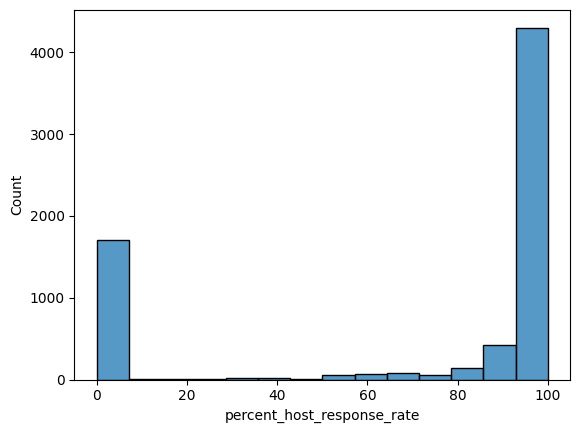

In [32]:
# Distribusi kolom percent_host_response_rate
sns.histplot(data=listings_filtered, x="percent_host_response_rate")

Karena distribusinya tidak normal, kita akan menggunakan median untuk menginput missing values pada kolom percent_host_response_rate

In [33]:
# mencari median kolom percent_host_response_rate
median_percent_host_response_rate = listings_filtered.percent_host_response_rate.median()

# menginput nan dengan median
listings_filtered.percent_host_response_rate.fillna(median_percent_host_response_rate, inplace=True)

Kita akan melakukan pengecekan kembali missing values pada data, untuk memastikan semua missing values sudah ditangani

In [34]:
# cek jumlah missing values
listings_filtered.isna().sum()

id                            0
host_name                     0
host_since                    0
host_response_time            0
percent_host_response_rate    0
property_type                 0
accommodates                  0
bedrooms                      0
price                         0
number_of_reviews             0
dtype: int64

Semua missing values sudah teratasi.

### 4. Pengecekan Duplikat

In [35]:
# cek jika terdapat data duplikat
listings_filtered[listings_filtered.duplicated()]

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews


Terlihat dataset ini tidak memiliki data duplikat

### 5. Pengecekan Konsistensi

Kita akan melakukan pengecekan konsistensi penulisan pada kolom-kolom kategori. Kali ini kita akan melihat data unik pada kolom property_type

In [36]:
# cek jumlah data unik pada property type
n_unique = listings_filtered.property_type.nunique()

print(f"Jumlah data unik pada kolom property type: {n_unique}")

Jumlah data unik pada kolom property type: 62


In [37]:
# cek data unik pada property type
listings_filtered.property_type.unique()

array(['Private room in rental unit', 'Private room in townhouse',
       'Private room in houseboat', 'Entire rental unit',
       'Entire guest suite', 'Private room in bed and breakfast',
       'Entire loft', 'Private room in home', 'Entire guesthouse',
       'Private room in boat', 'Entire townhouse',
       'Room in boutique hotel', 'Entire condo', 'Private room in loft',
       'Private room in guest suite', 'Entire home', 'Boat',
       'Private room in farm stay', 'Houseboat',
       'Room in bed and breakfast', 'Private room in condo',
       'Entire chalet', 'Private room in guesthouse',
       'Shared room in rental unit', 'Shared room in home',
       'Private room in island', 'Entire villa', 'Private room in villa',
       'Private room in tiny home', 'Private room in casa particular',
       'Entire serviced apartment', 'Barn', 'Private room in bungalow',
       'Entire cabin', 'Room in hotel', 'Entire place',
       'Private room in serviced apartment', 'Room in aparth

Dari data diatas
- Jumlah kategori properti cukup banyak yaitu 62.
- Beberapa property type memiliki kata yang sama, seperti `private room`, `shared room` dll.

Kita akan mereduksi jumlah kategori ini, dengan cara:
    
- Jika kategori mengandung kata Private room makan akan dijadikan kategori private room
- Jika kategori mengandung kata Shared room makan akan dijadikan kategori shared room
- Jika kategori mengandung kata Entire makan akan dijadikan kategori Entire Home/apt
- Selain itu diganti menjadi others

In [38]:
# menyeragamkan kategori yang mengandung private room
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'private room' if 'Private room' in x else x)

# menyeragamkan kategori yang mengandung shared room
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'shared room' if 'Shared room' in x else x)

# menyeragamkan kategori yang mengandung Entire
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'entire home/apt' if 'Entire' in x else x)

# menyeragamkan kategori yang tidak mengandung Entire shared dan private menjadi others
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'others' if ('entire' not in x
                                                                                               and 'private' not in x
                                                                                               and 'shared' not in x) else x)

Setelah mengatasi datanya kita lakukan pengecekan sekali lagi

In [39]:
# cek data unik pada property type
listings_filtered.property_type.unique()

array(['private room', 'entire home/apt', 'others', 'shared room'],
      dtype=object)

### 6. Handling Outlier

- Outlier biasanya terdapat pada kolom bertipe numeric.
- Pada kasus kali ini, kita akan mengidentifikasi outlier pada kolom price.
- Kita dapat menampilkan sebaran data price menggunakan histogram

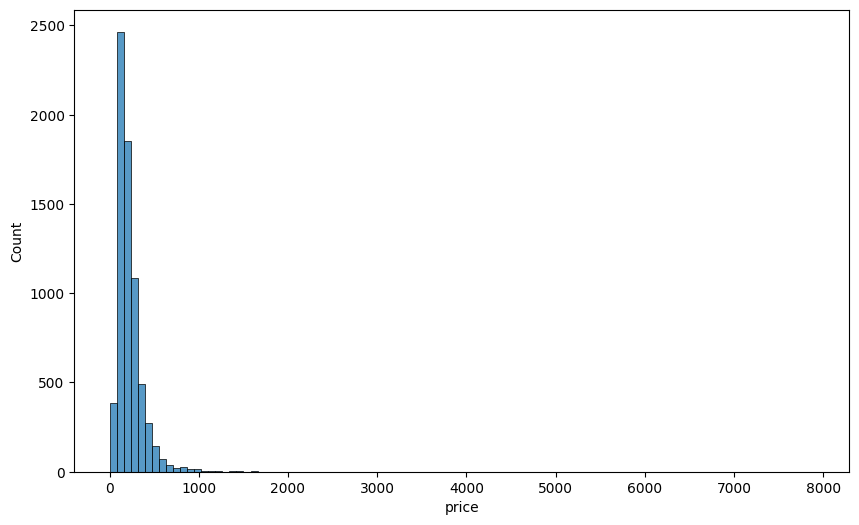

In [40]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = listings_filtered,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

- Terlihat skala dari x axis mencapai 8000.
- Hal ini terjadi karena terdapat data yang nilainya mendekati 8000.
- Hal ini bisa di validasi dengan melihat deskripsi statistik dari kolom price

In [41]:
# Deskripsi statistik dari kolom price
listings_filtered["price"].describe()

count    6893.000000
mean      218.487306
std       192.576328
min         0.000000
25%       125.000000
50%       180.000000
75%       264.000000
max      7900.000000
Name: price, dtype: float64

- Terlihat nilai maksimum dari kolom price berada di angka 7900.
- Angka ini sangat jauh dibanding nilai Q3 sebesar 264.
- Data di atas Q3 memiliki potensi sebagai outlier
- Kita **asumsikan** memang ada outlier

Masih ingat gambar ini?

<center>
<img src="https://miro.medium.com/max/720/1*0MPDTLn8KoLApoFvI0P2vQ.webp">
<br>
<a href="https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21">source</a>
</center>



- Kita akan tentukan suatu data adalah outlier, apabila nilainya lebih besar dari Q3 + 1.5 IQR

In [42]:
# Cari Q1 & Q3
Q1 = listings_filtered.price.quantile(0.25)
Q3 = listings_filtered.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 125.00
Q3 : 264.00


In [43]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 139.00
Maximum Boundary : 472.50


In [44]:
# Filter data tanpa outlier
listings_filtered = listings_filtered[listings_filtered["price"] < max_bound]

In [45]:
# Validasi hasil filter
listings_filtered["price"].describe()

count    6543.000000
mean      192.239034
std        92.366092
min         0.000000
25%       120.000000
50%       175.000000
75%       250.000000
max       471.000000
Name: price, dtype: float64

- Terlihat Q3 dan nilai maximum sudah tidak berbeda jauh
- Outlier telah dihilangkan

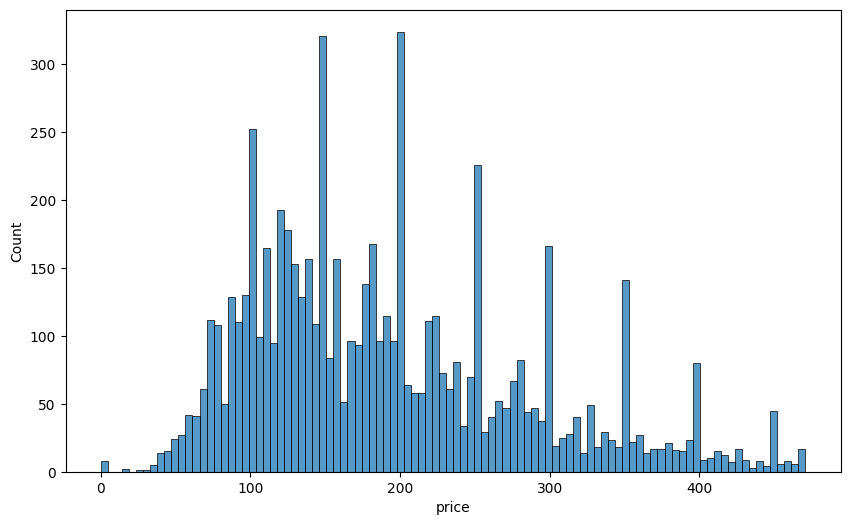

In [46]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = listings_filtered,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

## Analysis

Dalam studi kasus kali ini kita akan mencari informasi:
1. Jumlah host yang mendaftar dari tahun ke tahun
2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property
3. Distribusi response time host
4. Rata-rata review masing masing tipe property

### 1. Jumlah host yang mendaftar dari tahun ke tahun


Untuk melakukan ini kita akan meng-ekstrak data tahun dari data tanggal host_since

In [47]:
listings_filtered["year"] = listings_filtered.host_since.dt.year
listings_filtered

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews,year
0,2818,Daniel,2008-09-24,within an hour,100,private room,2,1.0,49.0,305,2008
1,20168,Alexander,2009-12-02,within an hour,100,private room,2,1.0,106.0,339,2009
2,27886,Flip,2010-03-23,within an hour,100,private room,2,1.0,136.0,231,2010
3,28871,Edwin,2010-05-13,within an hour,100,private room,2,1.0,75.0,428,2010
4,29051,Edwin,2010-05-13,within an hour,100,private room,1,1.0,55.0,582,2010
...,...,...,...,...,...,...,...,...,...,...,...
6888,12690380,Lennard,2014-05-03,within a few hours,100,entire home/apt,8,4.0,300.0,28,2014
6889,15005354,Gea,2015-10-13,within an hour,67,entire home/apt,6,4.0,195.0,18,2015
6890,15171981,Ischa,2016-09-22,within an hour,100,entire home/apt,6,4.0,449.0,21,2016
6891,17567812,Manon,2016-01-18,a few days or more,0,entire home/apt,6,5.0,282.0,8,2016


Untuk mendapatkan jumlah host yang mendaftar tiap tahun, kita akan mengelompokkan data berdasarkan tahun dan menghitung jumlah idnya

In [48]:
# jumlah host yang mendaftar tiap tahun
registred_host_each_year = listings_filtered.groupby("year").count()[["id"]]
registred_host_each_year

,id
year,
2008,2
2009,3
2010,42
2011,184
2012,617
2013,996
2014,1093
2015,966
2016,847


Agar lebih intuitif kita akan memvisualkan data tersebut

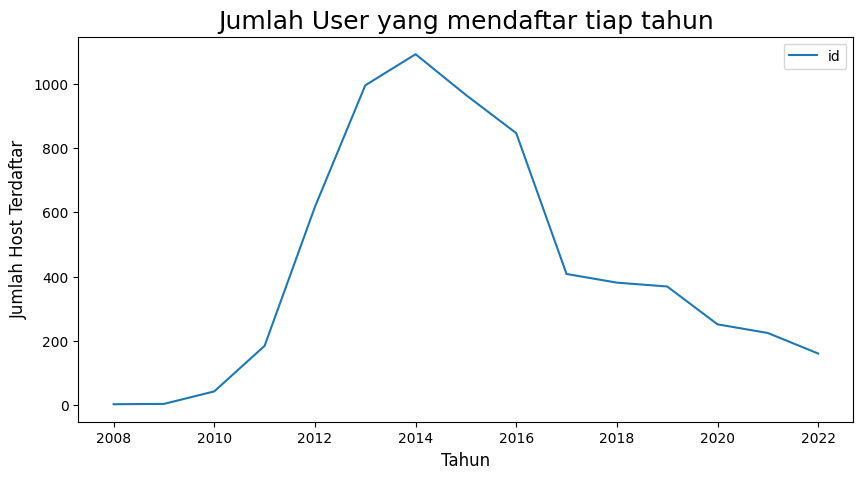

In [51]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 5))

# membuat plot
sns.lineplot(data=registred_host_each_year, ax=ax)

# menambahkan judul
ax.set_title("Jumlah User yang mendaftar tiap tahun", fontsize=18)

# menambahkan label
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("Jumlah Host Terdaftar", fontsize=12)

plt.show()

Dari visualisasi diatas:
- Mulai tahun 2010 banyak host yang mulai mendaftarkan propertinya ke Air BnB hingga mencapai puncak tertinggi di tahun 2014 sebanyak 1142 Host baru.
- Setelah tahun 2014 hingga 2022, jumlah host baru yang terdaftar mulai berkurang

### 2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property

Untuk mendapatkan informasi ini, kita akan memfilter terlebih dahulu data yang response ratenya diatas 70%

In [52]:
# filter data berdasarkan persentase response
response_abv_70 = listings_filtered[listings_filtered["percent_host_response_rate"] > 70]

n_response_abv_70_by_property_type = response_abv_70.groupby("property_type").count()[["id"]].reset_index()
n_response_abv_70_by_property_type

,property_type,id
0,entire home/apt,2849
1,others,426
2,private room,1363
3,shared room,27


Agar lebih intuitive kita coba visualkan menggunakan barplot

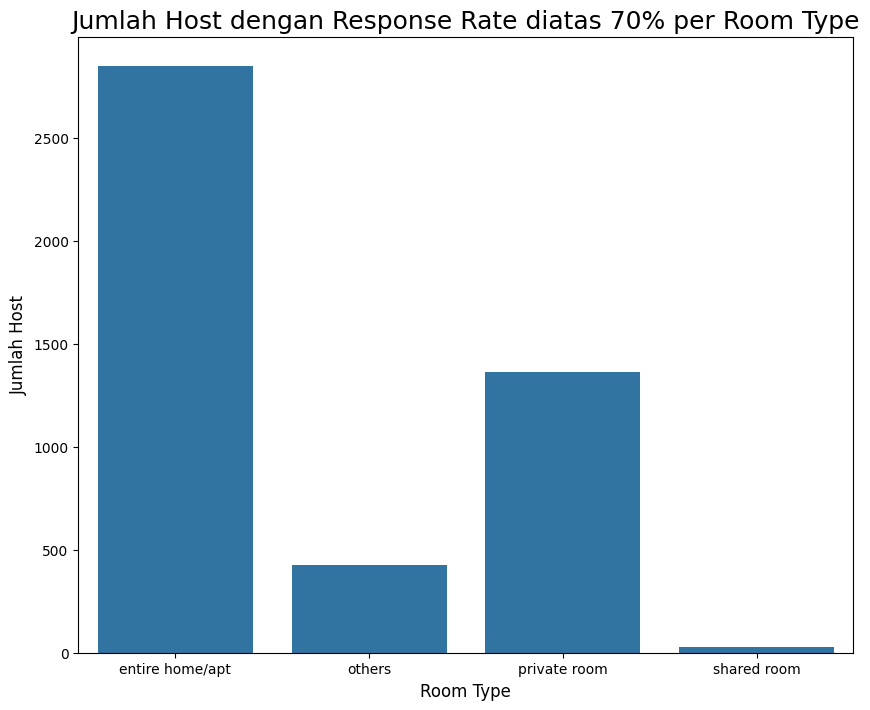

In [53]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=n_response_abv_70_by_property_type, x="property_type", y="id", ax=ax)

# menambahkan judul
ax.set_title("Jumlah Host dengan Response Rate diatas 70% per Room Type", fontsize=18)

# menambahkan label
ax.set_xlabel("Room Type", fontsize=12)
ax.set_ylabel("Jumlah Host", fontsize=12)

plt.show()

Dari data diatas:
- Host yang memiliki kategori property entire home/apt memiliki response rate yang paling tinggi dibanding yang lain
- Hanya sedikit host yang memiliki kategori properti shared room yang memiliki response rate diatas 70%

### 3. Distribusi response time host


Untuk melakukan mencari jumlah dari masing-masing kategori respon time, kita akan mengelempokkan berdasarkan response time

In [54]:
# Menghitung jumlah masing-masing response time
n_response_time = listings_filtered.groupby("host_response_time").count()[["id"]].reset_index()
n_response_time

,host_response_time,id
0,a few days or more,97
1,within a day,883
2,within a few hours,1161
3,within an hour,4402


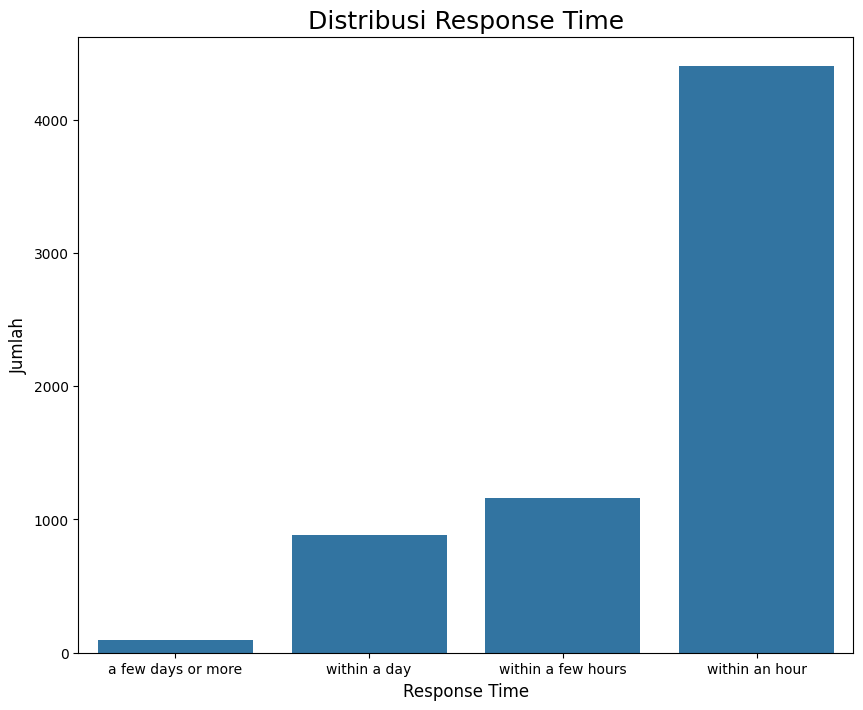

In [55]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=n_response_time, x="host_response_time", y="id", ax=ax)

# menambahkan judul
ax.set_title("Distribusi Response Time", fontsize=18)

# menambahkan label
ax.set_xlabel("Response Time", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

plt.show()

Dari data diatas:
- Sebagian besar host merespon dalam kurun waktu satu jam

### 4. Rata-rata jumlah review masing masing tipe property

Untuk melakukan ini kita akan mengelompokkan data berdasarkan tipe properti dan menghitung rata-rata review di masing-masing tipe properti

In [56]:
# rata-rata jumlah review tiap room type
mean_review_by_room_type = listings_filtered.groupby("property_type")[["number_of_reviews"]].mean().reset_index()
mean_review_by_room_type

,property_type,number_of_reviews
0,entire home/apt,25.234919
1,others,63.816956
2,private room,117.635110
3,shared room,91.222222


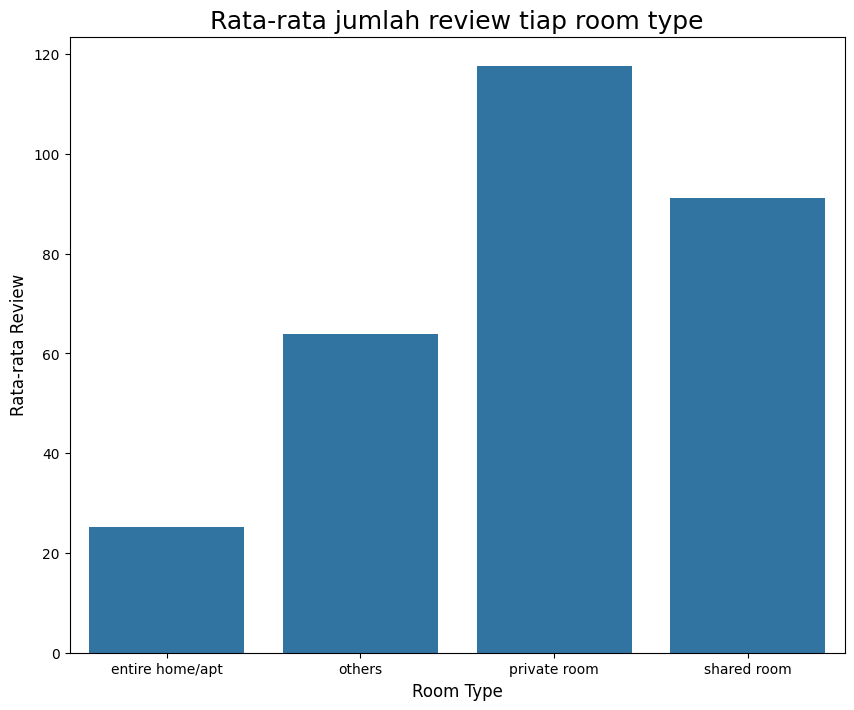

In [57]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=mean_review_by_room_type, x="property_type", y="number_of_reviews", ax=ax)

# menambahkan judul
ax.set_title("Rata-rata jumlah review tiap room type", fontsize=18)

# menambahkan label
ax.set_xlabel("Room Type", fontsize=12)
ax.set_ylabel("Rata-rata Review", fontsize=12)

plt.show()

Dari data diatas:
- Private room menjadi kategori property yang rata-rata jumlah reviewnya paling tinggi.
- Kategori entire home/apt memiliki rata-rata review yang rendah dibanding yang lain